In [145]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [148]:
#Load Car Dataset

df = pd.read_csv(r"C:\Users\Venky\Desktop\DS_Material\Data_Files\cars.csv")
df.head(2)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000


In [149]:
display(df.shape) # Check rows and columns count

(100, 13)

In [150]:
df.isnull().sum()  # Check for any values in any column

Car_ID               0
Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [96]:
display(df.describe())

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Brand_Encoded,Model_Encoded,Fuel_Type_Encoded,Transmission_Encoded,Owner_Type_Encoded
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.00000,100.000000
mean,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06,5.030000,28.770000,0.520000,0.43000,0.690000
std,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06,3.331681,17.388522,0.502117,0.49757,0.691872
min,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05,2.000000,12.000000,0.000000,0.00000,0.000000
50%,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06,5.000000,29.500000,1.000000,0.00000,1.000000
75%,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06,8.000000,44.250000,1.000000,1.00000,1.000000
max,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06,10.000000,57.000000,1.000000,1.00000,2.000000


<Axes: >

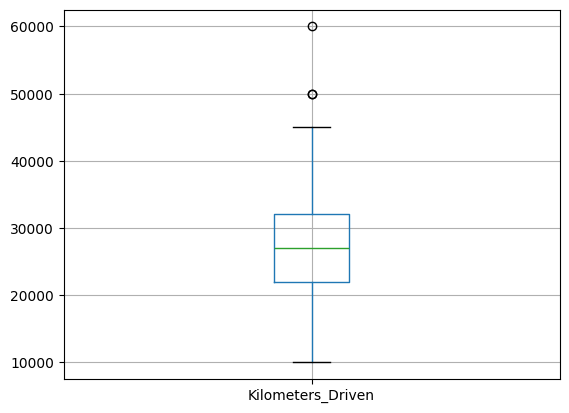

In [152]:
df.boxplot(column=['Kilometers_Driven'])  # Checking for outlier data in this varaible
# As per previsous describe output, mean is 28150.000000 so most of the data around to that value and max value is 60000.000000

# Remove unwanted variables based on domain knowledge

In [153]:
df.drop(columns=['Car_ID'],axis=1,inplace=True)
df

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


# Feature Engineering.
## As we have few categorical varaibles so lets convert into numerical using LabelEncoder technique

We have many encoding techniques however we use mainly Label Encoder and One hot encoder .

# Label Encoder:
    * Description: Converts each category into a unique integer.
    * Use Case: Suitable for ordinal categorical variables (where the order matters).
    * Pros: Simple and straightforward.
    * Cons: Implies an ordinal relationship where none exists.

# One Hot Encoder
    * Description: Creates binary columns for each category.
    * Use Case: Suitable for nominal categorical variables (no intrinsic order).
    * Pros: No assumption of ordinality; works well with many algorithms.
    * Cons: Increases dimensionality, which can be an issue with high cardinality.

In [155]:
from sklearn.preprocessing import LabelEncoder


# Applying Label Encoder for categorical variables and creating new variable by appending '_Encoded' string to it.
catagorical_features = df.select_dtypes(include='object')
display(catagorical_features.head(2))

le = LabelEncoder()

for col in catagorical_features:
    print('Cols is ',col)
    df[col+'_Encoded'] = le.fit_transform(df[col])

,Brand,Model,Fuel_Type,Transmission,Owner_Type
0,Toyota,Corolla,Petrol,Manual,First
1,Honda,Civic,Petrol,Automatic,Second


Cols is  Brand
Cols is  Model
Cols is  Fuel_Type
Cols is  Transmission
Cols is  Owner_Type


In [158]:
df.head(3)

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Encoded,Model_Encoded,Fuel_Type_Encoded,Transmission_Encoded,Owner_Type_Encoded
0,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000,9,15,1,1,0
1,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000,3,14,1,0,1
2,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000,2,30,1,0,0


In [156]:
catagorical_features.columns

Index(['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type'], dtype='object')

In [159]:
#Create new dataframe with numerical cols

filter_df = df.drop(columns=catagorical_features.columns,axis=1)
filter_df.head(2)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Brand_Encoded,Model_Encoded,Fuel_Type_Encoded,Transmission_Encoded,Owner_Type_Encoded
0,2018,50000,15,1498,108,5,800000,9,15,1,1,0
1,2019,40000,17,1597,140,5,1000000,3,14,1,0,1


# Lets check Feature Selection Using Correlation

In [160]:
X  = filter_df.drop('Price',axis=1)
y = filter_df['Price']
display(X.shape,y.shape)
corr_val = X.apply(lambda col: np.abs(np.corrcoef(col,y.values.flatten())[0,1]))
display(corr_val)

(100, 11)

(100,)

Year                    0.232687
Kilometers_Driven       0.051104
Mileage                 0.595252
Engine                  0.714465
Power                   0.856620
Seats                   0.000027
Brand_Encoded           0.354543
Model_Encoded           0.292434
Fuel_Type_Encoded       0.180964
Transmission_Encoded    0.676484
Owner_Type_Encoded      0.301488
dtype: float64

In [161]:
# Selecting Features which are having correlation greater than 0.05

selected_features_corr = corr_val[corr_val.values > 0.05]
display(type(selected_features_corr))
selected_features_corr_final = selected_features_corr.index.tolist()
selected_features_corr_final

pandas.core.series.Series

['Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Brand_Encoded',
 'Model_Encoded',
 'Fuel_Type_Encoded',
 'Transmission_Encoded',
 'Owner_Type_Encoded']

In [162]:
# Create new dataframe with selected features after correlation

filter_df_corr = filter_df[selected_features_corr_final]
display(filter_df_corr.head(2))
display(y.head(2))

,Year,Kilometers_Driven,Mileage,Engine,Power,Brand_Encoded,Model_Encoded,Fuel_Type_Encoded,Transmission_Encoded,Owner_Type_Encoded
0,2018,50000,15,1498,108,9,15,1,1,0
1,2019,40000,17,1597,140,3,14,1,0,1


0     800000
1    1000000
Name: Price, dtype: int64

In [163]:
# Split the data into X and Y

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(filter_df_corr,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80, 10), (20, 10), (80,), (20,))

# Now Model Development

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

LR_Corr = LinearRegression().fit(X_train,y_train)
y_pred_lr_corr = LR_Corr.predict(X_test)
display(y_pred_lr_corr[:10])
display(y_test.values[:10])


# Metrics

mse_corr = mean_squared_error(y_test,y_pred_lr_corr)
mae_corr = mean_absolute_error(y_test,y_pred_lr_corr)
r2_corr = r2_score(y_test,y_pred_lr_corr)

display(f"mse_corr is {mse_corr} and mae_corr is {mae_corr} and r2_corr is {r2_corr}")


array([1312244.29869889,  949036.16808917, 1337687.03364247,
       1312244.29869889, 1207748.31550793,  487885.87979041,
       1468575.00929359,  414775.5450628 , 1895953.57647364,
        574443.87630093])

array([1600000,  700000, 1300000, 1600000,  850000,  650000,  850000,
        500000, 2300000,  800000], dtype=int64)

'mse_corr is 220931209697.2108 and mae_corr is 359841.42322669254 and r2_corr is 0.7298634105310133'

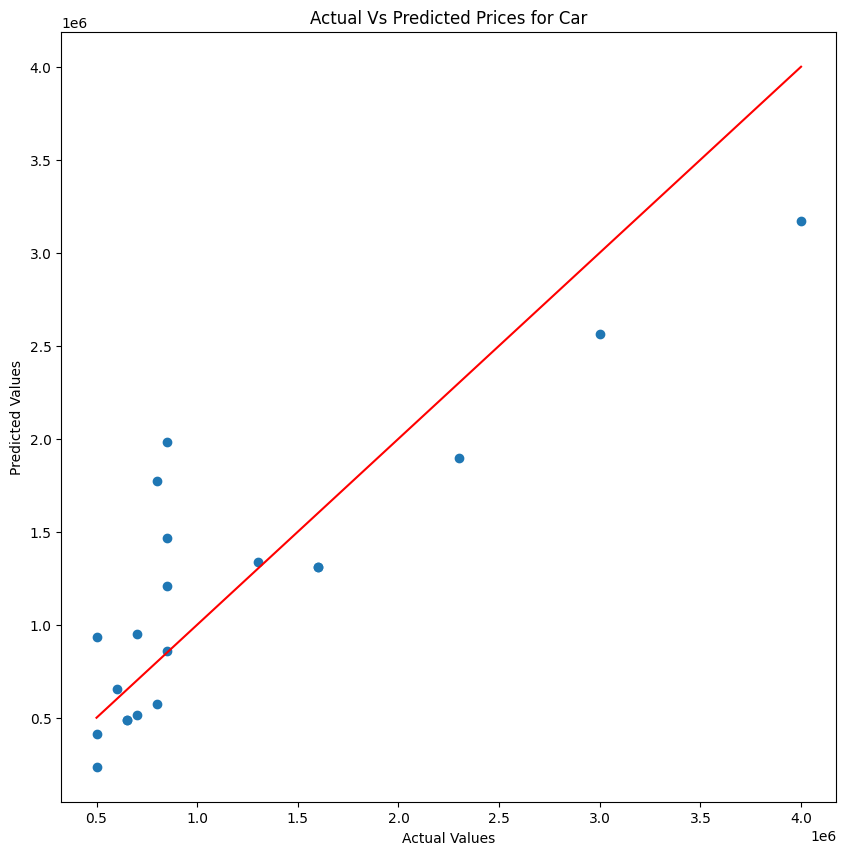

In [165]:
# Visualize
plt.figure(figsize=(10,10))

plt.scatter(y_test,y_pred_lr_corr)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Vs Predicted Prices for Car")
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red')
plt.show()

# As per above Metrics values, we have not great job so need to recheck our features and see where we can be improved

## Lets check if any outliers exist

In [166]:
filter_df.head(3)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Brand_Encoded,Model_Encoded,Fuel_Type_Encoded,Transmission_Encoded,Owner_Type_Encoded
0,2018,50000,15,1498,108,5,800000,9,15,1,1,0
1,2019,40000,17,1597,140,5,1000000,3,14,1,0,1
2,2017,20000,10,4951,395,4,2500000,2,30,1,0,0


In [167]:
filter_df.dtypes

Year                    int64
Kilometers_Driven       int64
Mileage                 int64
Engine                  int64
Power                   int64
Seats                   int64
Price                   int64
Brand_Encoded           int32
Model_Encoded           int32
Fuel_Type_Encoded       int32
Transmission_Encoded    int32
Owner_Type_Encoded      int32
dtype: object

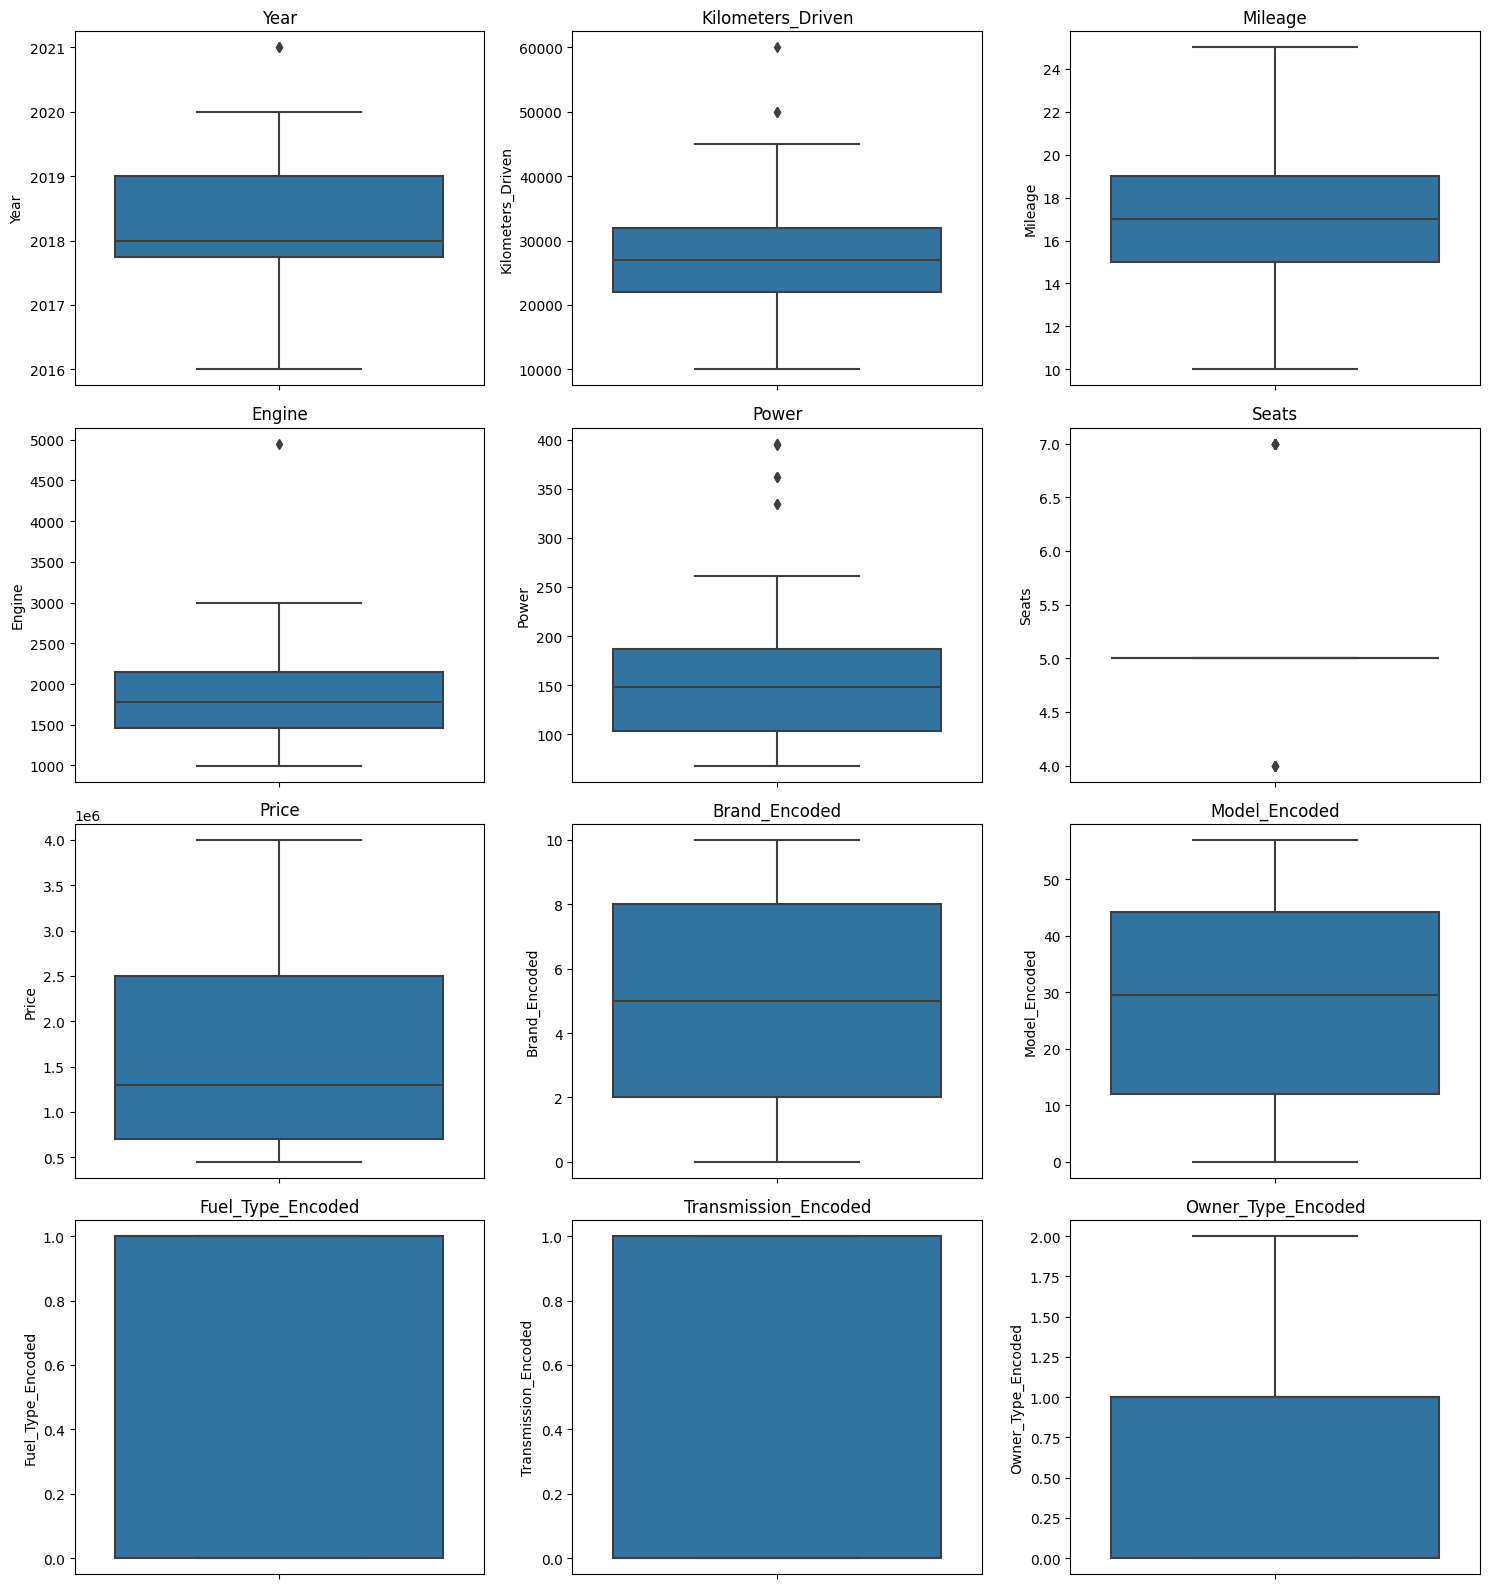

In [180]:
num_features = len(filter_df.columns)
ncols = 3
nrows = (num_features // ncols) + (num_features % ncols > 0)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 4))
axes = axes.flatten()

# Create box plots for each feature
for i, col in enumerate(filter_df.columns):
    # sns.boxplot(y=filter_df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## We can see outliers mainly in "Power and Kilometers_Driven features", however we want all features to be considered here so in this kind of scenarios we can choose Tree Based models 
## Such as Decision Tree, Random Forest and Gradient boost which are less affected by outliers

In [169]:
# Split the data into X and Y

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(filter_df,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80, 12), (20, 12), (80,), (20,))

In [170]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=5)
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [171]:
from sklearn.metrics import mean_absolute_error,median_absolute_error,r2_score

y_pred_dt = dt_model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred_dt)
med_ae = median_absolute_error(y_test,y_pred_dt)
r2_dt = r2_score(y_test,y_pred_dt)
print(f"mae is {mae} and median ae is {med_ae} and r2_dt is {r2_dt}")



mae is 19166.666666666664 and median ae is 10000.0 and r2_dt is 0.998467187001148


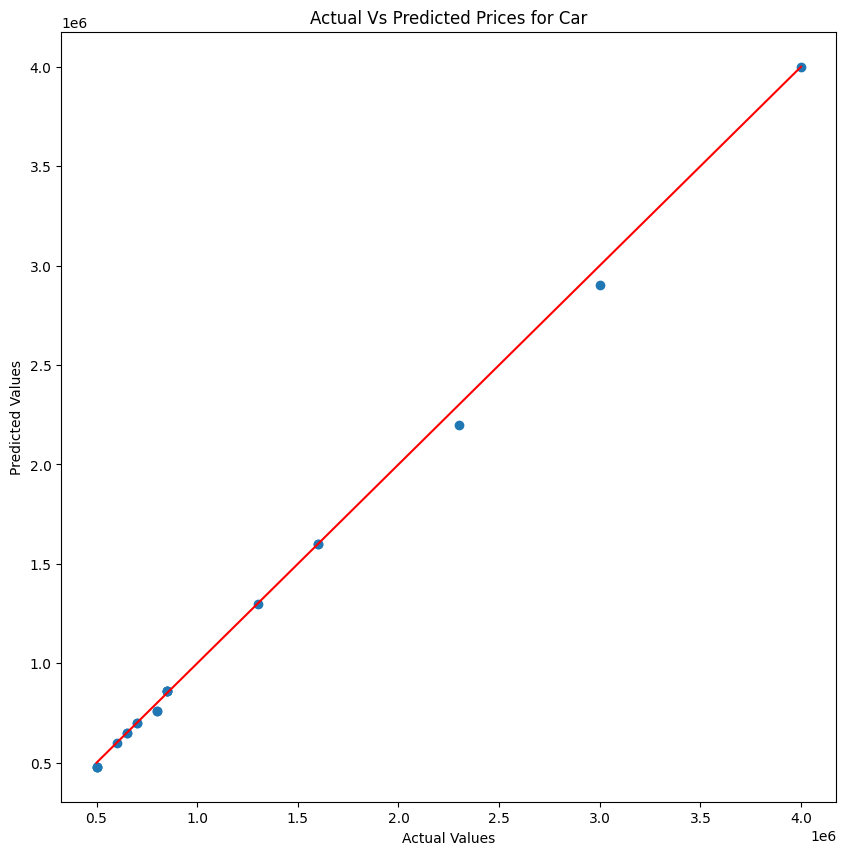

In [172]:
# Visualize
plt.figure(figsize=(10,10))

plt.scatter(y_test,y_pred_dt)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Vs Predicted Prices for Car")
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red')
plt.show()

In [178]:
outlier_df = filter_df
display(outlier_df.head(2))
display('rows and cols are ',outlier_df.shape)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Brand_Encoded,Model_Encoded,Fuel_Type_Encoded,Transmission_Encoded,Owner_Type_Encoded
0,2018,50000,15,1498,108,5,800000,9,15,1,1,0
1,2019,40000,17,1597,140,5,1000000,3,14,1,0,1


'rows and cols are '

(100, 12)

# So far we have seen Decision Tree Model which is less affected by outliers but however my goal is to linear regression Model and see result 
# However we didnt get good results initially so lets handle outliers for each variable and see if we get any improvement with this.

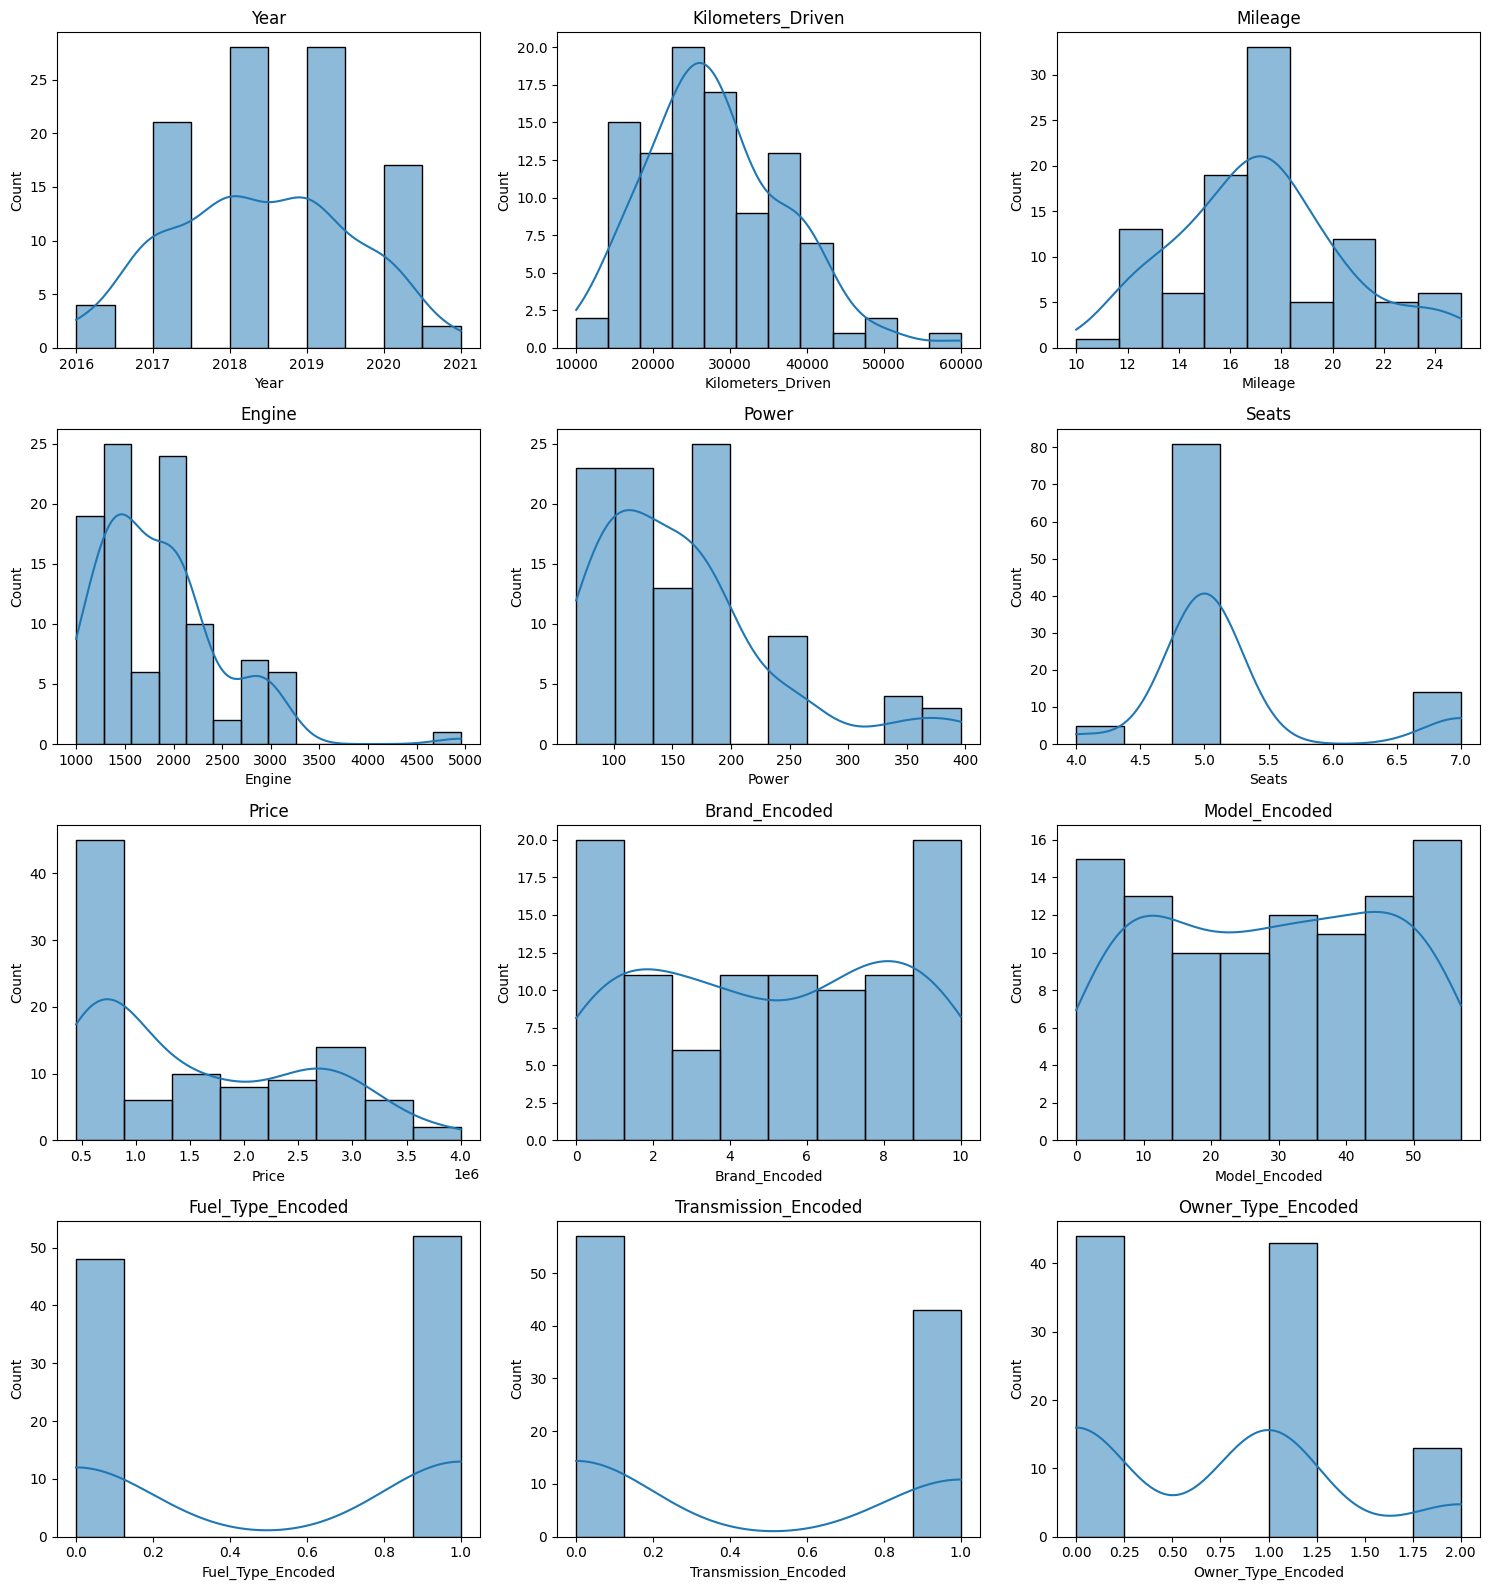

In [192]:
# We are  checking visualization for each variable using histplot.
# we have already seen outliers using boxplot.

num_features = len(outlier_df.columns)
ncols = 3
nrows = (num_features // ncols) + (num_features % ncols > 0)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 4))
axes = axes.flatten()

# Create hist plots for each feature
for i, col in enumerate(outlier_df.columns):
    
    sns.histplot(outlier_df[col],ax=axes[i],kde=True)
    axes[i].set_title(col)
    

plt.tight_layout()
plt.show()

# For Handling Outliers, we have mainly 2 Techniques 
1. IQR (Inter Quartile Range)
2. Z-score
   
Z = (X- Mew)/Sigma
# As we identified earlier outliers using boxplot, so lets remove outlier data from "Power and Kilometers_Driven features".




In [220]:
# Lets use Z-score technique for this case and verify result
cols = ['Power','Kilometers_Driven']
for col in cols:
    mean= np.mean(outlier_df[col])
    std = np.std(outlier_df[col])
    outlier_df[col+'_z_score'] = (outlier_df[col] - mean)/std
    print(f"mean is {mean} and std is {std} for col {col}")


mean is 158.13 and std is 76.58232890164676 for col Power
mean is 28150.0 and std is 9075.654246389073 for col Kilometers_Driven


In [221]:
outlier_df['Power_z_score'].max(),outlier_df['Power_z_score'].min()

(3.1060690293904742, -1.1769033573757237)

In [222]:
outlier_df['Kilometers_Driven_z_score'].max(),outlier_df['Kilometers_Driven_z_score'].min()

(3.5093888699728892, -1.9998558238621016)

# AS per above quick check, we have values which are greater than 3 but nothing is less than -3 so lets take only less than or equal to 3 values data

In [228]:
outlier_filter_df = outlier_df[(np.abs(outlier_df['Power_z_score']) <= 3) & (np.abs(outlier_df['Power_z_score']) <= 3)]
outlier_filter_df.shape

(97, 15)

In [230]:
outlier_filter_df.drop(columns=['Power_z_score','Kilometers_Driven_z_score'],axis=1,inplace=True)


C:\Users\Venky\AppData\Local\Temp\ipykernel_19100\1020077284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_filter_df.drop(columns=['Power_z_score','Kilometers_Driven_z_score'],axis=1,inplace=True)


In [236]:
outlier_filter_df.drop(columns=['z_score'],axis=1,inplace=True)

C:\Users\Venky\AppData\Local\Temp\ipykernel_19100\2800151394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_filter_df.drop(columns=['z_score'],axis=1,inplace=True)


In [237]:
outlier_filter_df

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Brand_Encoded,Model_Encoded,Fuel_Type_Encoded,Transmission_Encoded,Owner_Type_Encoded
0,2018,50000,15,1498,108,5,800000,9,15,1,1,0
1,2019,40000,17,1597,140,5,1000000,3,14,1,0,1
3,2020,30000,23,1248,74,5,600000,6,42,0,1,2
4,2016,60000,18,1999,194,5,850000,4,41,0,0,1
5,2019,35000,17,1198,108,5,750000,8,31,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019,22000,16,1950,191,5,2900000,7,11,0,0,0
96,2017,38000,13,2755,171,7,1400000,9,29,0,1,1
97,2018,26000,18,1497,121,5,750000,2,18,1,1,2
98,2019,24000,17,1497,113,5,850000,4,50,1,0,1


In [241]:

X = outlier_filter_df.drop(columns=['Price'],axis=1)
y= outlier_filter_df['Price']

In [243]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((77, 11), (20, 11), (77,), (20,))

In [244]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

LR_Corr = LinearRegression().fit(X_train,y_train)
y_pred_lr_corr = LR_Corr.predict(X_test)
display(y_pred_lr_corr[:10])
display(y_test.values[:10])


# Metrics

mse_corr = mean_squared_error(y_test,y_pred_lr_corr)
mae_corr = mean_absolute_error(y_test,y_pred_lr_corr)
r2_corr = r2_score(y_test,y_pred_lr_corr)

display(f"mse_corr is {mse_corr} and mae_corr is {mae_corr} and r2_corr is {r2_corr}")


array([2959409.61198629,   59683.46698885, 1594924.81580436,
       2815430.91703911, 1404818.48978765, 3477001.58802602,
       2492970.53014804, 1058273.05233875, 2056733.09596956,
        706394.9640193 ])

array([3200000,  450000, 1400000, 2500000, 1600000, 3200000, 2700000,
        700000, 2000000,  800000], dtype=int64)

'mse_corr is 71605804529.60611 and mae_corr is 226067.23136612176 and r2_corr is 0.9251455106318146'

# So when we compare previous result of Linear Regression without removing outlier
## 'mse_corr is 220931209697.2108 and mae_corr is 359841.42322669254 and r2_corr is 0.729863410531013

## is not good with current result after removing outliers.
## However decision tree result far better than these 2 so we need to experiment with each Model with different techniques and see results as above.
